# Exercises

In [1]:
import os, sys

if not os.path.exists("code"):
    try:
        os.chdir("neural-data/01-local_field_potential")
        print("✅ Changed working directory.")
    except:
        print("❌ Could not change working directory.")

# imports
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np


sys.path.append(os.path.abspath("code"))


from utils import download_data
import lfp_functions as lf


sns.set_theme(context='notebook', style='white', font_scale=1.5,
              rc={'axes.spines.top': False, 'axes.spines.right': False,
                  'image.cmap': plt.cm.jet})


✅ Changed working directory.


## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

## testing

In [2]:
download_data('https://surfdrive.surf.nl/files/index.php/s/9nY01qMimFLez40')
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0, 0.5, 'voltage (mV)')

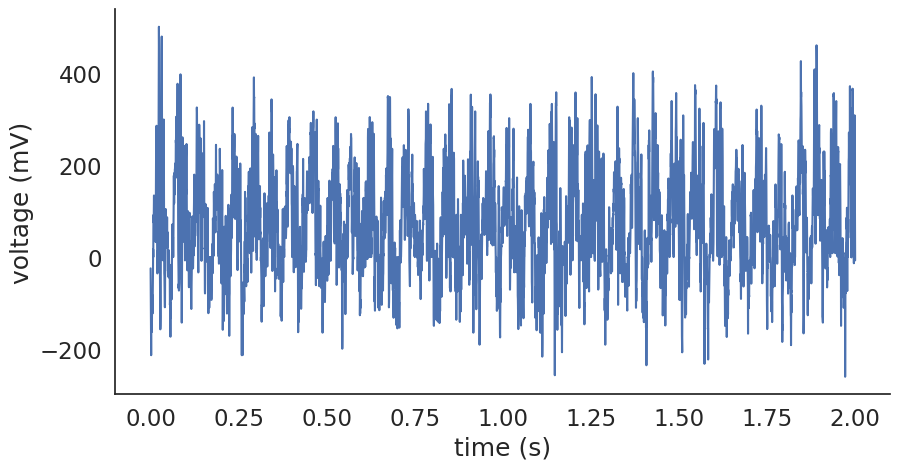

In [3]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,5000),lfp[:5000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

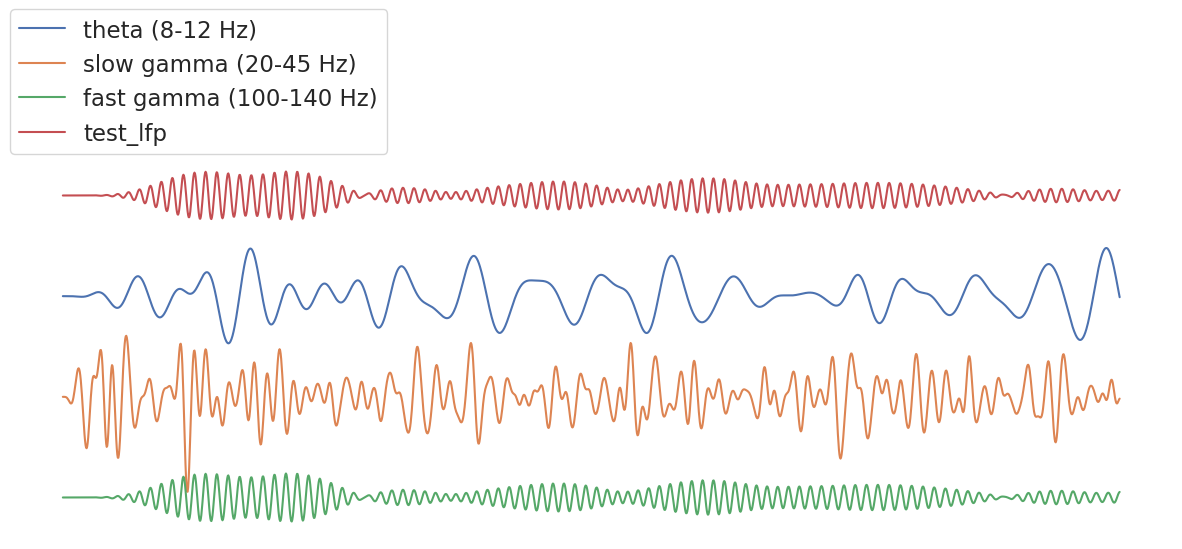

In [4]:
theta_lfp = lf.bandpass_filter(lfp,low_f=8,high_f=15, sampling_rate=sampling_rate)
slow_gamma_lfp = lf.bandpass_filter(lfp,low_f=15,high_f=45, sampling_rate=sampling_rate)
fast_gamma_lfp = lf.bandpass_filter(lfp,low_f=45,high_f=50, sampling_rate=sampling_rate)
test_lfp =  lf.bandpass_filter(lfp,low_f=50,high_f=140, sampling_rate=sampling_rate)
plot_offset = 200 #to plot the signal on different lines

plt.figure(figsize=(15,5))


plt.plot(theta_lfp[:2000]+2*plot_offset,label='theta (8-12 Hz)')
plt.plot(slow_gamma_lfp[:2000]+plot_offset,label = 'slow gamma (20-45 Hz)')
plt.plot(fast_gamma_lfp[:2000],label = 'fast gamma (100-140 Hz)')
plt.plot(fast_gamma_lfp[:2000]+3*plot_offset,label = 'test_lfp')


plt.axis('off')
plt.legend(loc=(0,1))

# Answers

## Influence of width of the band


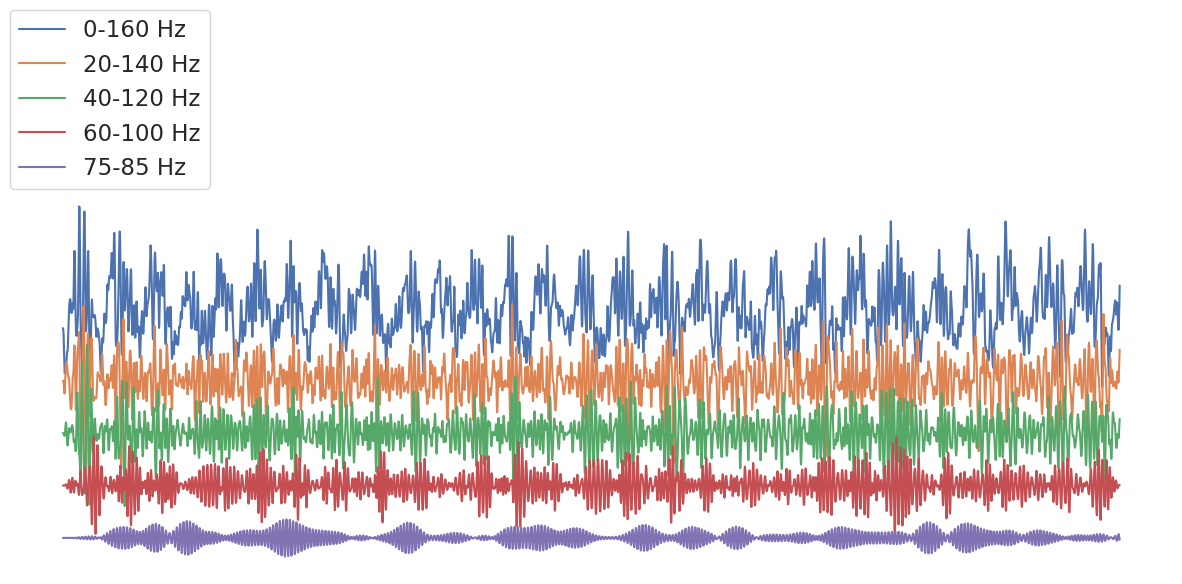

In [5]:
# effect of the broadening the band
# center around 80 Hz

filter1_lfp =lf.bandpass_filter(lfp,low_f=75,high_f=85, sampling_rate=sampling_rate)
filter2_lfp =lf.bandpass_filter(lfp,low_f=60,high_f=100, sampling_rate=sampling_rate)
filter3_lfp =lf.bandpass_filter(lfp,low_f=40,high_f=120, sampling_rate=sampling_rate)
filter4_lfp =lf.bandpass_filter(lfp,low_f=20,high_f=140, sampling_rate=sampling_rate)
filter5_lfp =lf.bandpass_filter(lfp,low_f=0.0001,high_f=160, sampling_rate=sampling_rate)




plot_offset = 200 #to plot the signal on different lines

plt.figure(figsize=(15,5))


plt.plot(filter5_lfp[:4000]+4*plot_offset,label='0-160 Hz')
plt.plot(filter4_lfp[:4000]+3*plot_offset,label='20-140 Hz')
plt.plot(filter3_lfp[:4000]+2*plot_offset,label='40-120 Hz')
plt.plot(filter2_lfp[:4000]+1*plot_offset,label='60-100 Hz')
plt.plot(filter1_lfp[:4000]+0*plot_offset,label='75-85 Hz')


plt.axis('off')
plt.legend(loc=(0,1))

## Influence shifting central frequency

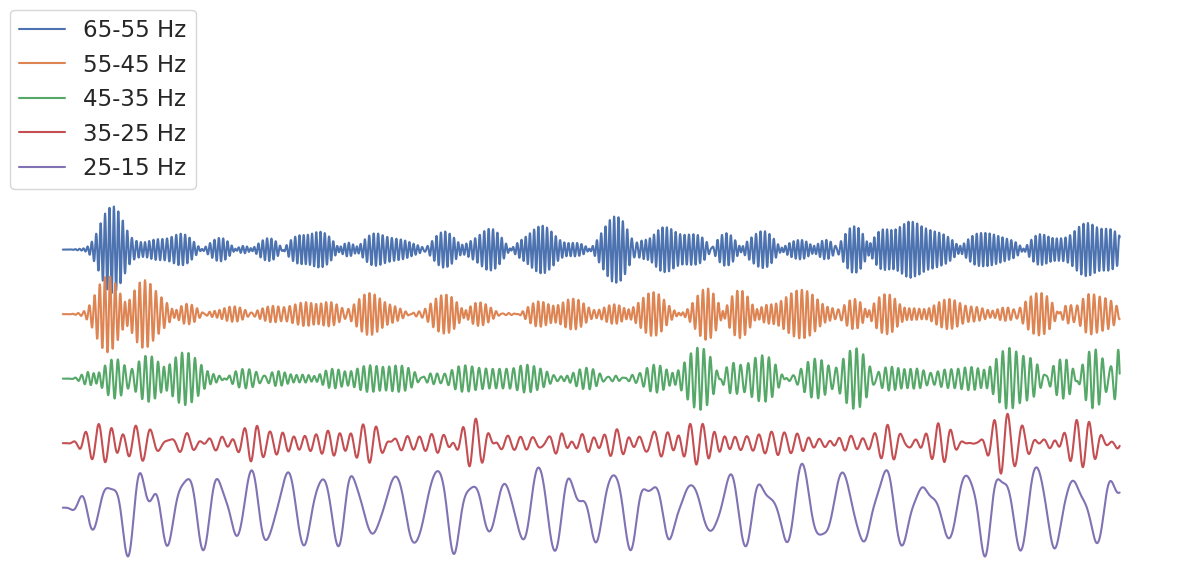

In [6]:
# effect of shifting of the central frequency of the band
# take bandwith of 10 Hz

filter1_lfp =lf.bandpass_filter(lfp,low_f=5,high_f=15, sampling_rate=sampling_rate)
filter2_lfp =lf.bandpass_filter(lfp,low_f=15,high_f=25, sampling_rate=sampling_rate)
filter3_lfp =lf.bandpass_filter(lfp,low_f=35,high_f=45, sampling_rate=sampling_rate)
filter4_lfp =lf.bandpass_filter(lfp,low_f=45,high_f=55, sampling_rate=sampling_rate)
filter5_lfp =lf.bandpass_filter(lfp,low_f=55,high_f=65, sampling_rate=sampling_rate)




plot_offset = 200 #to plot the signal on different lines

plt.figure(figsize=(15,5))


plt.plot(filter5_lfp[:4000]+4*plot_offset,label='65-55 Hz')
plt.plot(filter4_lfp[:4000]+3*plot_offset,label='55-45 Hz')
plt.plot(filter3_lfp[:4000]+2*plot_offset,label='45-35 Hz')
plt.plot(filter2_lfp[:4000]+1*plot_offset,label='35-25 Hz')
plt.plot(filter1_lfp[:4000]+0*plot_offset,label='25-15 Hz')


plt.axis('off')
plt.legend(loc=(0,1))

## Order of the filter

In [7]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, low_f, high_f, sampling_rate, order=4):
    """
    Butterworth filter.
    
    Parameters:
        signal (array): Input signal to filter
        low_f (float): Low cutoff frequency (Hz)
        high_f (float): High cutoff frequency (Hz)
        sampling_rate (float): Sampling rate of the signal (Hz)
        order (int): Order of the Butterworth filter (default=4)
        
    Returns:
        filtered_signal (array): Bandpass filtered signal
    """
    nyquist = 0.5 * sampling_rate
    low = low_f / nyquist
    high = high_f / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal


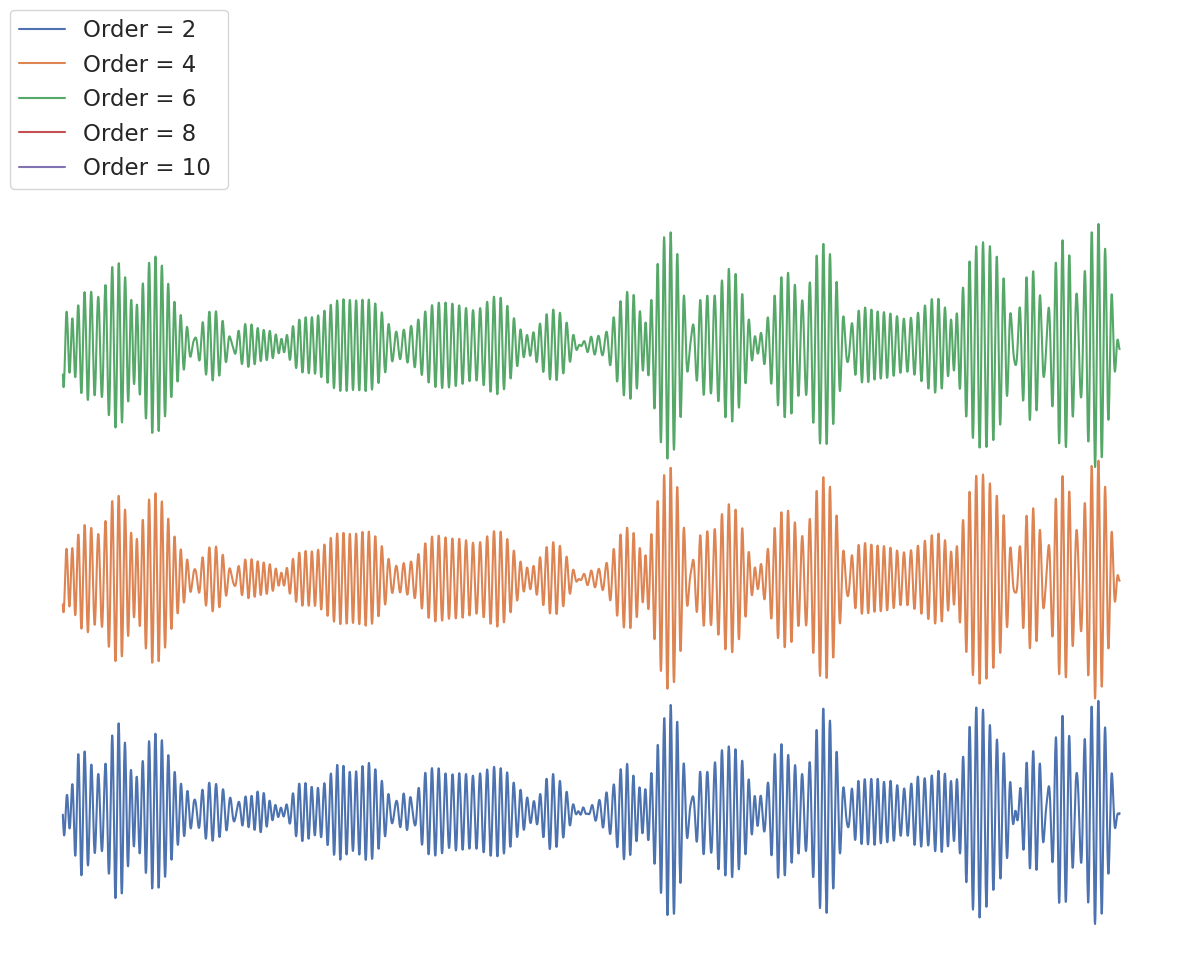

In [8]:
filter1_lfp =bandpass_filter(lfp,low_f=35,high_f=45, sampling_rate=sampling_rate, order = 2)
filter2_lfp =bandpass_filter(lfp,low_f=35,high_f=45, sampling_rate=sampling_rate, order = 4)
filter3_lfp =bandpass_filter(lfp,low_f=35,high_f=45, sampling_rate=sampling_rate, order = 6)
filter4_lfp =bandpass_filter(lfp,low_f=35,high_f=45, sampling_rate=sampling_rate, order = 8)
filter5_lfp =bandpass_filter(lfp,low_f=35,high_f=45, sampling_rate=sampling_rate, order = 10)

plt.figure(figsize=(15,10))
plt.plot(filter1_lfp[:4000]+0*plot_offset,label='Order = 2 ')
plt.plot(filter2_lfp[:4000]+1*plot_offset,label='Order = 4 ')
plt.plot(filter3_lfp[:4000]+2*plot_offset,label='Order = 6 ')
plt.plot(filter4_lfp[:4000]+3*plot_offset,label='Order = 8 ')
plt.plot(filter4_lfp[:4000]+4*plot_offset,label='Order = 10 ')


plt.axis('off')
plt.legend(loc=(0,1))

In [9]:
# Use a short segment 
n_seconds = 2
n_samples = int(n_seconds * sampling_rate)
lfp_segment = lfp[:n_samples]
t = np.linspace(0, n_seconds, n_samples)

# Filter settings
low_f = 35
high_f = 45
orders = [2, 4, 6, 8, 10]
filtered_signals = {}

# Filtering and timing
print("Computing time for each filter order:")
for order in orders:
    nyquist = 0.5 * sampling_rate
    low = low_f / nyquist
    high = high_f / nyquist
    b, a = butter(order, [low, high], btype='band')

    # Measure timing using timeit
    print(f"Order {order}:")
    get_ipython().run_line_magic('timeit', 'filtfilt(b, a, lfp_segment)')






Computing time for each filter order:
Order 2:
101 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Order 4:
102 µs ± 112 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Order 6:
105 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Order 8:
124 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Order 10:
115 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Comments

1. Influence width of the band:
Broadening the band gives a more complicated looking signal. As to be expected since more signals are combined.


2. Shifting central frequency:
As expected when shifting the central frequency but keeping the band the same we find a bigger wavelength at the lower frequencies.



3. Influence of the order:
The influence of the order seems te be not really visible up to a order of 6. The signals seem to vanish at higher orders? the computation also increases slightly when increasing the order.



## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

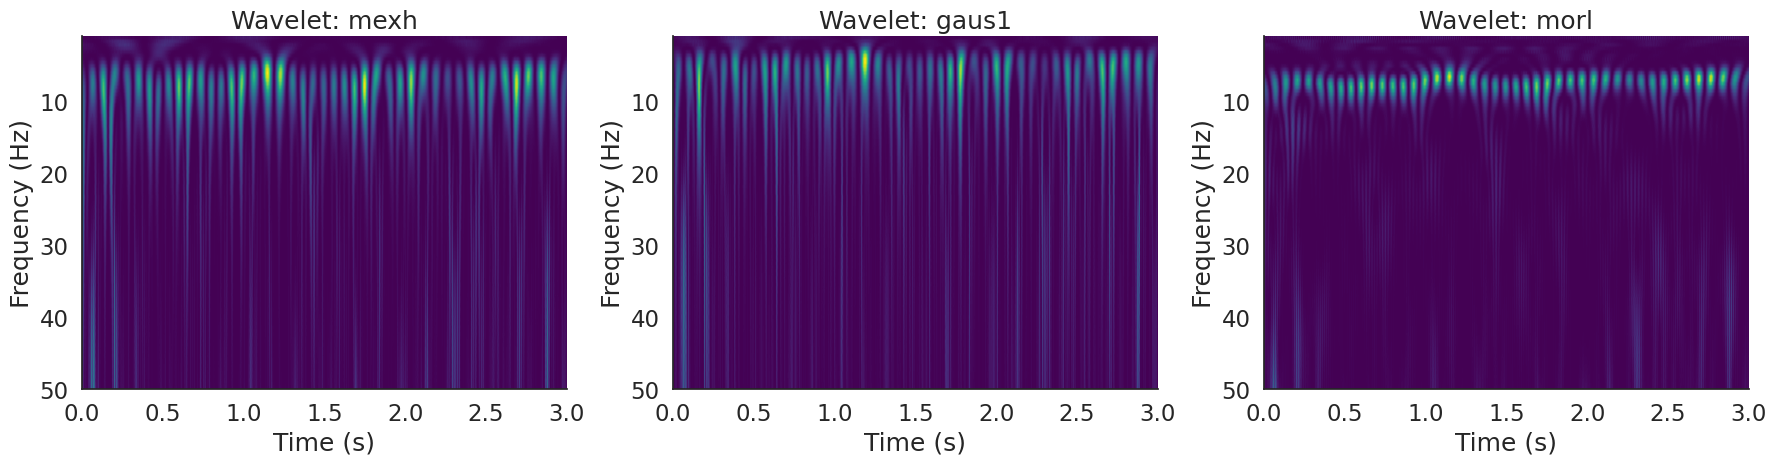

In [10]:
import pickle
import pywt
from pywt import scale2frequency, cwt


with open('data/moving_lfp.pickle', 'rb') as handle:
    data = pickle.load(handle)

lfp = data['lfp']
sampling_rate = data['sampling_rate']

start = 0
end = 3
sig = lfp[int(start * sampling_rate):int(end * sampling_rate)]
sig -= np.mean(sig)
time = np.linspace(start, end, len(sig))

#Frequencies and real wavelets
frequencies = np.linspace(1, 50, 100)
wavelets = ['mexh', 'gaus1', 'morl']

#Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, wavelet in enumerate(wavelets):
    scales = scale2frequency(wavelet, frequencies / sampling_rate)
    coeffs, _ = cwt(sig, wavelet=wavelet, scales=scales, sampling_period=1/sampling_rate)

    im = axes[i].imshow(np.abs(coeffs)**2, extent=[start, end, frequencies[-1], frequencies[0]],
                        aspect='auto', cmap='viridis', origin='upper')
    axes[i].set_title(f'Wavelet: {wavelet}')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Frequency (Hz)')

fig.tight_layout()
plt.show()


## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/sleep_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

In [11]:

with open("data/moving_lfp.pickle", "rb") as f:
    data = pickle.load(f)

lfp = data["lfp"]
sampling_rate = data["sampling_rate"]

In [12]:
# Helper function to compute band power using Hilbert transform ---
from scipy.signal import hilbert
def bandpower(signal, low, high, fs):
    nyq = 0.5 * fs
    b, a = butter(4, [low / nyq, high / nyq], btype='band')
    filtered = filtfilt(b, a, signal)
    analytic = hilbert(filtered)
    power = np.abs(analytic) ** 2
    return power

theta_power = bandpower(lfp, 6, 10, sampling_rate)
delta_power = bandpower(lfp, 2, 4, sampling_rate)

# Results
print("Theta power shape:", theta_power.shape)
print("Delta power shape:", delta_power.shape)

Theta power shape: (600133,)
Delta power shape: (600133,)


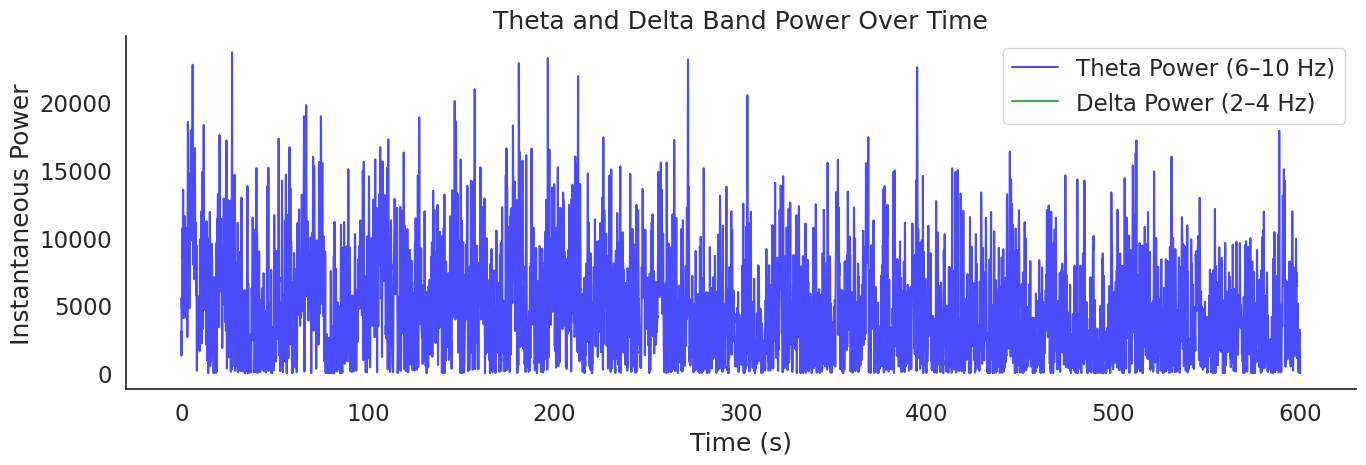

In [13]:

# Recompute time axis
time = np.arange(len(theta_power)) / sampling_rate

#Check shape
assert len(time) == len(theta_power) == len(delta_power), "Length mismatch in time/power arrays."

#Plot
plt.figure(figsize=(14, 5))
plt.plot(time, theta_power, label='Theta Power (6–10 Hz)', color='blue', alpha=0.7)
plt.plot(time, delta_power, label='Delta Power (2–4 Hz)', color='green', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Instantaneous Power")
plt.title("Theta and Delta Band Power Over Time")
plt.legend()
plt.tight_layout()
plt.show()


I cant seem to figure out why the Delta power spectrum is flat